In [41]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kstest

fat_df = pd.read_csv(r'D:\Fat.csv', sep=";") #Подгружаем данные и разделяем их

fat_df.head()

,Body Fat,Waist,Weight
0,6,"81,28","79,379"
1,21,"91,44","82,1"
2,15,"96,52","90,719"
3,6,"83,82","72,121"
4,22,"99,06","88,904"


In [42]:
fat_df = fat_df.rename(columns = {'Body Fat': 'body_fat', 'Waist':'waist', 'Weight':'weight'}) # Для удобства привел названия колонок к одному регистру

fat_df.columns

Index(['body_fat', 'waist', 'weight'], dtype='object')

In [43]:
#Перевел значения из string в float

fat_df['waist'] = fat_df['waist'].str.replace(',', '.').astype(float)
fat_df['weight'] = fat_df['weight'].str.replace(',', '.').astype(float)


fat_df.head()

,body_fat,waist,weight
0,6,81.28,79.379
1,21,91.44,82.100
2,15,96.52,90.719
3,6,83.82,72.121
4,22,99.06,88.904


C:\Users\Morzhig\AppData\Local\Temp\ipykernel_13816\2557205272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fat_df)


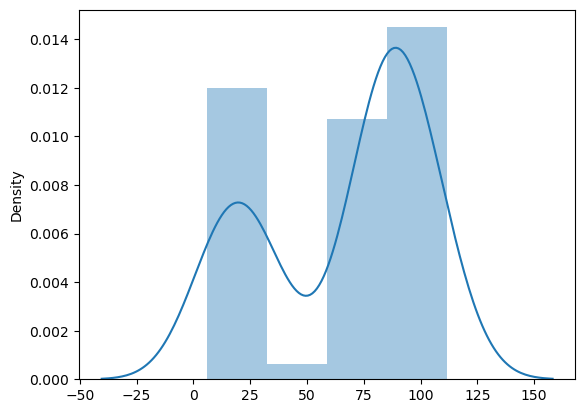

In [44]:
sns.distplot(fat_df)
plt.show()

In [10]:
# По графику видна ассиметрия, горбы.

SyntaxError: invalid syntax (2053818961.py, line 1)

In [45]:
print(fat_df.describe()) #Дескриптивные статистики

       body_fat       waist      weight
count   20.0000   20.000000   20.000000
mean    19.7500   94.107000   85.547650
std      9.5635    9.697451   12.093825
min      6.0000   81.280000   66.225000
25%     10.0000   85.725000   77.905000
50%     21.0000   93.980000   85.048500
75%     27.2500  101.600000   91.286000
max     38.0000  111.760000  111.584000


In [46]:
#Матрица корреляции

corr = fat_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,body_fat,waist,weight
body_fat,1.000000,0.886865,0.696636
waist,0.886865,1.000000,0.852807
weight,0.696636,0.852807,1.000000


In [ ]:
# Матрица корреляции показывает, что между всеми параметрами есть сильная зависимость

In [47]:
# Построим таблицу регрессии
import statsmodels.api as sm

x, y = fat_df[['weight', 'waist']], fat_df['body_fat']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:               body_fat   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     33.91
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.16e-06
Time:                        13:35:04   Log-Likelihood:                -56.951
No. Observations:                  20   AIC:                             119.9
Df Residuals:                      17   BIC:                             122.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.0737     10.406     -6.254      0.0

In [48]:
# Видим, что по результатам таблицы, не ни одного элемента со значением p-value >= 0.05, соотвестветнно, все они влияют на жировую массу тела
# Уравнение регрессии в данном случае будет иметь вид: x1 = 1.06*x3 - 0.17*x2 - 65.07, где x1 - body_fat, x2 - weight, x3 - waist

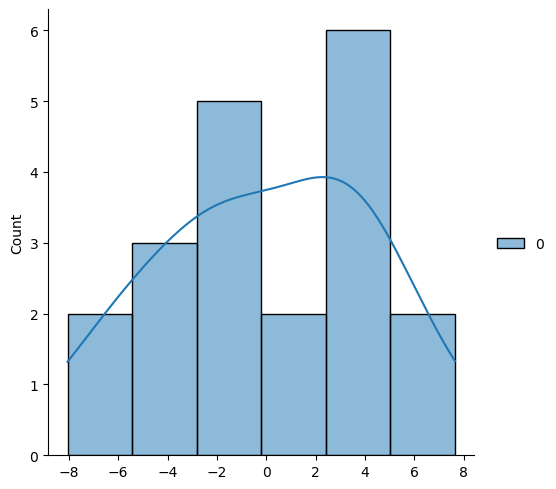

In [50]:
# Для определения, насколько качественна полученная модель, проведем анализ остатков

raw_residuals = model.resid

sns.displot(pd.DataFrame(raw_residuals), kde=True)
plt.show()

In [ ]:
# Отсутсвует ярко-выраженная ассиметрия, гипотеза о нормальности не нарушается

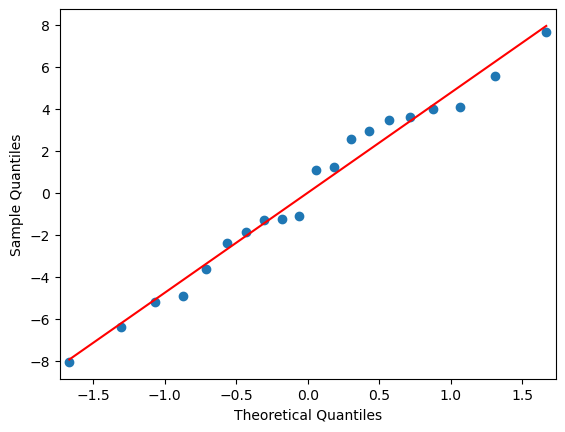

In [51]:
fig = sm.qqplot(raw_residuals, line='r')
plt.show()

In [ ]:
# qq-График показывает, что отсвутсвуют отклонения от прямой нормального распеределния, что опять-таки позволяет не отклонять гипотезу о нормальности

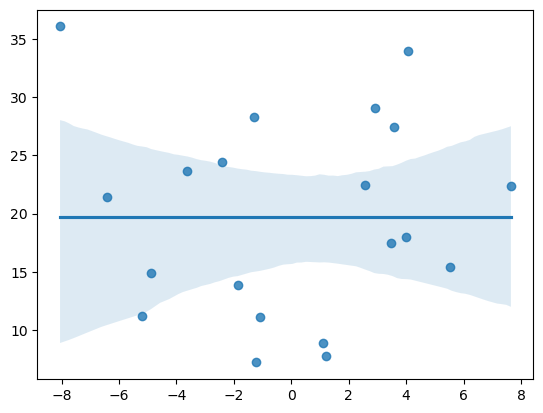

In [52]:
sns.regplot(x = raw_residuals, y = model.predict())

plt.show()

In [ ]:
# График показывает соотношение остатков с предсказанными значениями, видно отсутствие систематичности в распределении точек, что позволяет сделать вывод о том, что гипотеза о нормальности подтвердилась. 

In [54]:
# Для проверки приемлимости модели в целом, выведем таблицу ANOVA

model = sm.formula.ols('body_fat ~ waist + weight', data=fat_df).fit()
anovatable = sm.stats.anova_lm(model, typ=2)

print(anovatable)

raw_residuals = model.resid

              sum_sq    df          F    PR(>F)
waist     546.159346   1.0  26.660395  0.000078
weight     22.701246   1.0   1.108146  0.307219
Residual  348.258494  17.0        NaN       NaN


In [ ]:
# Она показывает, что уровень значимости p-value < 0,05, то есть мы можем утверждать, что наша модель приемлема и будет работать лучше чем наивный прогноз по средним значениям.
# Коэффициент R^2 = 0.8 => Мы учли 80 процентов факторов в нашей модели

In [67]:
le_df = pd.read_csv(r'D:\Life Expectancy.csv', sep=';') #Подгружаем данные и разделяем их

le_df.head()

,Country,Births/Woman,Life Expectancy,Female,Male
0,Sweden,"1,54","79,97","82,78","77,31"
1,Australia,"1,76","80,13","83,13","77,27"
2,Italy,"1,26","79,4","82,52","76,47"
3,Canada,"1,61","79,83","83,38","76,44"
4,Greece,"1,35","78,89","81,65","76,32"


In [68]:
le_df = le_df.rename(columns = {'Country': 'country', 'Births/Woman':'births_woman', 'Life Expectancy':'le', 'Female':'f', 'Male':'m'}) # Для удобства привел названия колонок к одному регистру

le_df.columns

Index(['country', 'births_woman', 'le', 'f', 'm'], dtype='object')

In [69]:
#Перевел значения из string в float

le_df['births_woman'] = le_df['births_woman'].str.replace(',', '.').astype(float)
le_df['le'] = le_df['le'].str.replace(',', '.').astype(float)
le_df['f'] = le_df['f'].str.replace(',', '.').astype(float)
le_df['m'] = le_df['m'].str.replace(',', '.').astype(float)

le_df.head()

,country,births_woman,le,f,m
0,Sweden,1.54,79.97,82.78,77.31
1,Australia,1.76,80.13,83.13,77.27
2,Italy,1.26,79.40,82.52,76.47
3,Canada,1.61,79.83,83.38,76.44
4,Greece,1.35,78.89,81.65,76.32


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


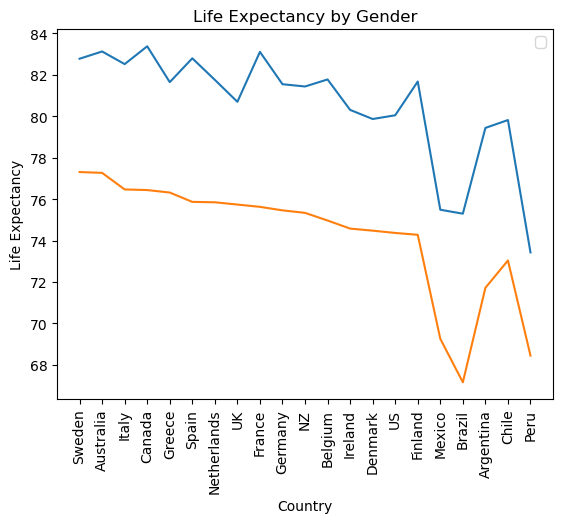

In [95]:
# График ожидаемой продолжительности жизни для обоих полов
plt.plot(le_df['country'], le_df['f'])
plt.plot(le_df['country'], le_df['m'])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Gender')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Видим, что продолжительность жизни женщин больше продолжительности жизни мужчин в каждой стране, меньше всего живут в Бразилии.

In [70]:
df = le_df.drop(columns = ['country', 'births_woman', 'le'])
                
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,f,m
f,1.000000,0.947710
m,0.947710,1.000000


In [71]:
import statsmodels.api as sm

x, y = df['f'], df['m']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     167.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.13e-11
Time:                        14:00:08   Log-Likelihood:                -27.252
No. Observations:                  21   AIC:                             58.50
Df Residuals:                      19   BIC:                             60.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3363      6.155     -0.867      0.3

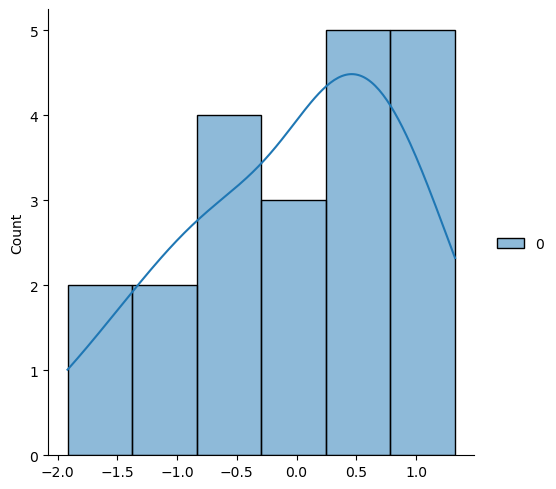

In [72]:
raw_residuals = model.resid

sns.displot(pd.DataFrame(raw_residuals), kde=True)
plt.show()

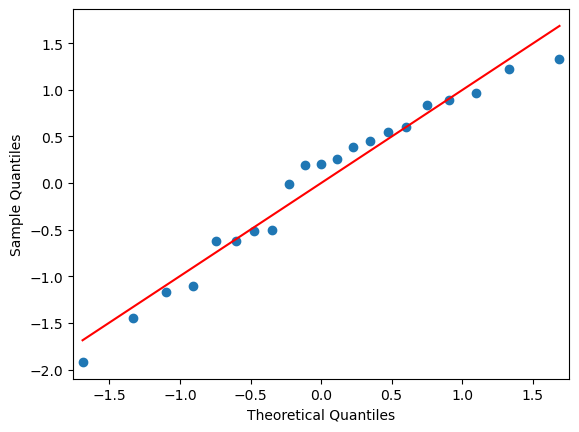

In [73]:
fig = sm.qqplot(raw_residuals, line='r')
plt.show()

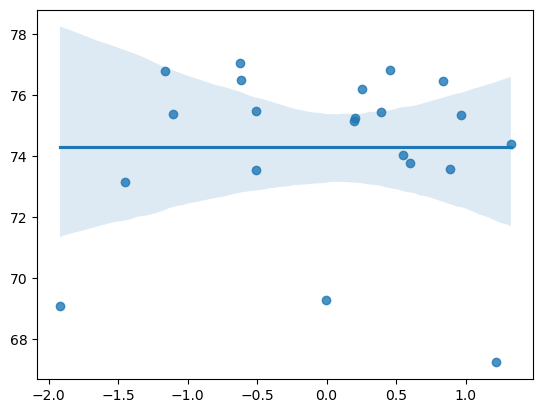

In [74]:
sns.regplot(x = raw_residuals, y = model.predict())

plt.show()

In [77]:
model = sm.formula.ols('m ~ f', data=df).fit()
anovatable = sm.stats.anova_lm(model, typ=2)

print(anovatable)

raw_residuals = model.resid

              sum_sq    df          F        PR(>F)
f         145.317391   1.0  167.55549  7.134142e-11
Residual   16.478305  19.0        NaN           NaN


In [ ]:
# Получилось, что средняя продолжительность жизни женщин линейно зависит от продолжительности жизни мужчин
# Полученная регрессионная модель учитывает 89.8% факторов, так как R^2 = 0.898

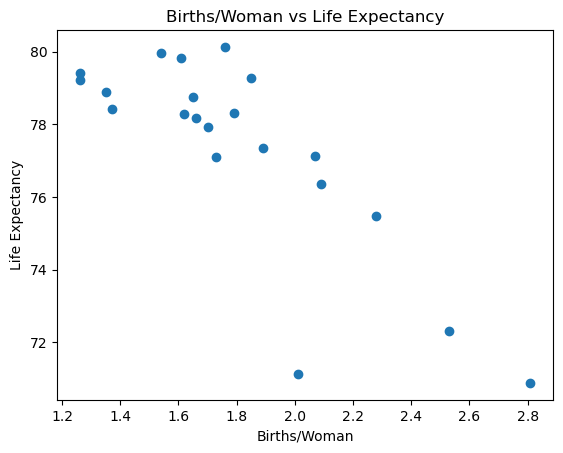

In [86]:
# Диаграмма рассеяния между показателем "Births/Woman" и ожидаемой продолжительностью жизни
plt.scatter(le_df['births_woman'], le_df['le'])
plt.xlabel('Births/Woman')
plt.ylabel('Life Expectancy')
plt.title('Births/Woman vs Life Expectancy')
plt.show()

In [80]:
df = le_df.drop(columns = ['country', 'f', 'm'])
                
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,births_woman,le
births_woman,1.000000,-0.812413
le,-0.812413,1.000000


In [ ]:
# Корреляционная таблица показывает, что с увеличением параметра births_woman уменьшается продолжительность жизни, о чем свидетельствуют отрицательные коэффициенты корреляции

In [88]:
import statsmodels.api as sm

x, y = df['le'], df['births_woman']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:           births_woman   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     36.88
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           7.69e-06
Time:                        14:14:22   Log-Likelihood:                 1.4152
No. Observations:                  21   AIC:                             1.170
Df Residuals:                      19   BIC:                             3.259
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8890      1.497      7.273      0.0

In [ ]:
# Можно построить уравнение регрессии: le = 10.89 - 0.12 * biths_woman

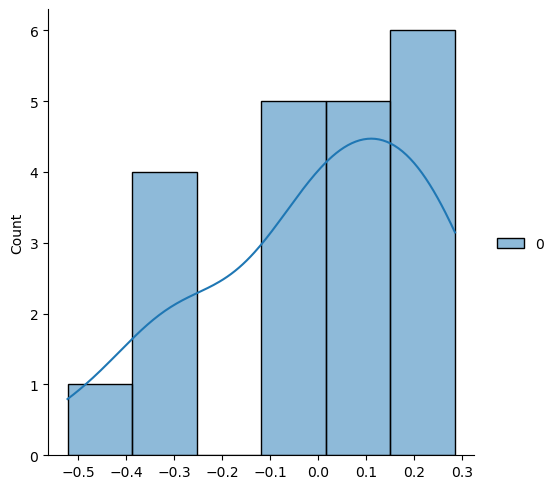

In [90]:
raw_residuals = model.resid

sns.displot(pd.DataFrame(raw_residuals), kde=True)
plt.show()

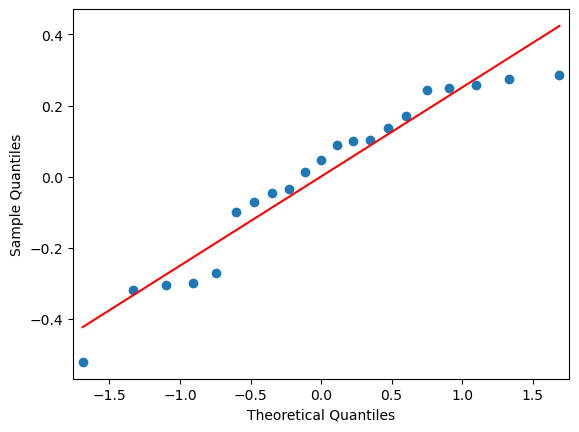

In [91]:
fig = sm.qqplot(raw_residuals, line='r')
plt.show()

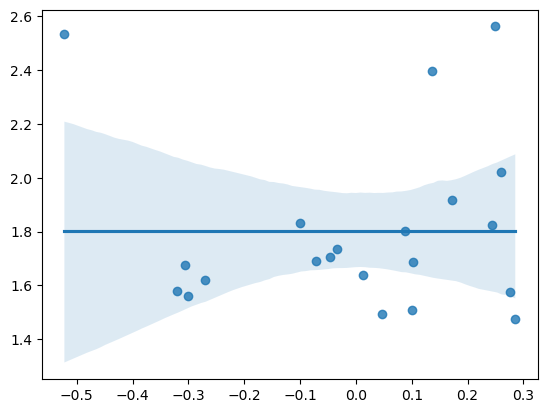

In [92]:
sns.regplot(x = raw_residuals, y = model.predict())

plt.show()

In [94]:
model = sm.formula.ols('le ~ births_woman', data=df).fit()
anovatable = sm.stats.anova_lm(model, typ=2)

print(anovatable)

raw_residuals = model.resid

                 sum_sq    df          F    PR(>F)
births_woman  99.737689   1.0  36.884784  0.000008
Residual      51.376635  19.0        NaN       NaN


In [ ]:
# Полученная регрессионная модель учитывает 66% факторов, так как R^2 = 0.066